In [25]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [26]:
#Case 7A: k = 1e-14 || CO2 injection at 60°C (&42MPa) + H2O in the reservoir || 400m Well Spacing || m_flux_CO2 = 6

In [27]:
k_CO2_1em14 = pd.read_csv('CO2_8A_csv.csv')
#Energy production in Joules (bc. h_w or h_g is in kJ/kg)
k_CO2_1em14["Energy Production at this timestep"] = (k_CO2_1em14.mass_kg_h2o_extracted_this_timestep * k_CO2_1em14.h_w)*1000
k_CO2_1em14["Cumulative Energy Produced"] = k_CO2_1em14["Energy Production at this timestep"].cumsum()
k_CO2_1em14["Cumulative Produced CO2"] = k_CO2_1em14["mass_kg_co2_extracted_this_timestep"].cumsum()
# Injected CO2: time * mass flow CO2
k_CO2_1em14["Injected CO2 [kg]"] = k_CO2_1em14["time"]*6
#Conversion to kilotons
k_CO2_1em14["Injected CO2 [kt]"] = k_CO2_1em14["Injected CO2 [kg]"]*1e-6
#
#MW produced:

k_CO2_1em14["MW"] = (k_CO2_1em14["Cumulative Energy Produced"]/1e6)/k_CO2_1em14["time"]

#Stored CO2:
# = Injected CO2 - produced CO2 [kg]
k_CO2_1em14["Stored CO2 [kt]"] = (k_CO2_1em14["Injected CO2 [kg]"] - k_CO2_1em14["mass_kg_co2_extracted_this_timestep"])*1e-6

k_CO2_1em14["Time [y]"] = k_CO2_1em14["time"]/3.154E7
k_CO2_1em14.rename(columns={"time": "Time [s]","heat_joules_extracted_this_timestep_co2": "Heat Extracted CO2 [Joules]","heat_joules_extracted_this_timestep_h2o": "Heat Extracted H2O [Joules]","mass_kg_co2_extracted_this_timestep":"Mass CO2 Extracted [kg]","mass_kg_h2o_extracted_this_timestep":"Mass H2O Extracted [kg]","temperature":"Temperature [°C]","mu_g":"$\u03BC_g$","mu_w":"$\u03BC_w$","rhog":"$\u03C1_g$","rhow":"$\u03C1_w$","h_g":"$h_g$","h_w":"$h_w$","Sg":"$S_g$","Sw":"$S_w$"}, inplace=True)
k_CO2_1em14

,Time [s],$S_g$,$S_w$,$h_g$,$h_w$,Heat Extracted CO2 [Joules],Heat Extracted H2O [Joules],Mass CO2 Extracted [kg],Mass H2O Extracted [kg],$μ_g$,...,$ρ_w$,Temperature [°C],Energy Production at this timestep,Cumulative Energy Produced,Cumulative Produced CO2,Injected CO2 [kg],Injected CO2 [kt],MW,Stored CO2 [kt],Time [y]
0,0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0,0.0000,NaN,0.000000,0.000000
1,86400,0.000000e+00,1.000000,457718.633211,3.064773e+06,0.000000e+00,1.426470e+10,0.000000,4642.682819,0.000038,...,121.305025,772.588707,1.422877e+13,1.422877e+13,0.000000,518400,0.5184,164.684813,0.518400,0.002739
2,259200,0.000000e+00,1.000000,457617.002648,3.066664e+06,0.000000e+00,2.429190e+10,0.000000,7906.689864,0.000038,...,120.525153,772.219153,2.424716e+13,3.847593e+13,0.000000,1555200,1.5552,148.441075,1.555200,0.008218
3,604800,0.000000e+00,1.000000,457442.729176,3.067350e+06,0.000000e+00,4.403209e+10,0.000000,14337.330751,0.000038,...,120.117362,771.778201,4.397761e+13,8.245354e+13,0.000000,3628800,3.6288,136.331904,3.628800,0.019176
4,1296000,0.000000e+00,1.000000,457238.658041,3.067681e+06,0.000000e+00,8.073334e+10,0.000000,26299.314428,0.000038,...,119.811400,771.329205,8.067792e+13,1.631315e+14,0.000000,7776000,7.7760,125.873033,7.776000,0.041091
5,2678400,0.000000e+00,1.000000,457060.831972,3.068126e+06,0.000000e+00,1.464218e+11,0.000000,47710.519977,0.000038,...,119.488704,770.997046,1.463819e+14,3.095133e+14,0.000000,16070400,16.0704,115.559041,16.070400,0.084921
6,5443200,0.000000e+00,1.000000,456952.431921,3.068978e+06,0.000000e+00,2.579395e+11,0.000000,84043.079260,0.000038,...,119.082286,770.865814,2.579263e+14,5.674397e+14,0.000000,32659200,32.6592,104.247442,32.659200,0.172581
7,10972800,0.000000e+00,1.000000,456902.547335,3.070057e+06,0.000000e+00,4.447038e+11,0.000000,144854.177931,0.000038,...,118.647169,770.889205,4.447106e+14,1.012150e+15,0.000000,65836800,65.8368,92.241753,65.836800,0.347901
8,22032000,0.000000e+00,1.000000,456853.098282,3.070811e+06,0.000000e+00,7.843267e+11,0.000000,255415.951349,0.000038,...,118.330363,770.934487,7.843342e+14,1.796485e+15,0.000000,132192000,132.1920,81.539784,132.192000,0.698542
9,44150400,0.000000e+00,1.000000,456745.802140,3.070860e+06,0.000000e+00,1.472432e+12,0.000000,479483.285907,0.000038,...,118.215692,770.896028,1.472426e+15,3.268911e+15,0.000000,264902400,264.9024,74.040342,264.902400,1.399822


In [28]:
#Case 6B: k = 1e-14 || H2O only - injection Temp 60°C (&42MPa) || 400m Well Spacing || m_flux_H2O = 6,7 kg/s 

In [29]:
k_H2O_1em14 = pd.read_csv("H2O_8B_csv.csv")
#Energy production in Joules (bc. h_w or h_g is in kJ/kg)
k_H2O_1em14["Energy Production at this timestep"] = (k_H2O_1em14.mass_kg_h2o_extracted_this_timestep * k_H2O_1em14.h_w)*1000
k_H2O_1em14["Cumulative Energy Produced"] = k_H2O_1em14["Energy Production at this timestep"].cumsum()
#MW produced:

k_H2O_1em14["MW"] = (k_H2O_1em14["Cumulative Energy Produced"]/1e6)/k_H2O_1em14["time"]

k_H2O_1em14["Time [y]"] = k_H2O_1em14["time"]/3.154E7
k_H2O_1em14.rename(columns={"time": "Time [s]","heat_joules_extracted_this_timestep_co2": "Heat Extracted CO2 [Joules]","heat_joules_extracted_this_timestep_h2o": "Heat Extracted H2O [Joules]","mass_kg_co2_extracted_this_timestep":"Mass CO2 Extracted [kg]","mass_kg_h2o_extracted_this_timestep":"Mass H2O Extracted [kg]","temperature":"Temperature [°C]","mu_g":"$\u03BC_g$","mu_w":"$\u03BC_w$","rhog":"$\u03C1_g$","rhow":"$\u03C1_w$","h_g":"$h_g$","h_w":"$h_w$","Sg":"$S_g$","Sw":"$S_w$"}, inplace=True)
k_H2O_1em14

,Time [s],$S_g$,$S_w$,$h_g$,$h_w$,Heat Extracted CO2 [Joules],Heat Extracted H2O [Joules],Mass CO2 Extracted [kg],Mass H2O Extracted [kg],$μ_g$,$μ_w$,$ρ_g$,$ρ_w$,Temperature [°C],Energy Production at this timestep,Cumulative Energy Produced,MW,Time [y]
0,0,0,0,0.000000,0.000000e+00,0,0.000000e+00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000
1,86400,0,1,457718.636145,3.064773e+06,0,1.426465e+10,0,4642.663938,0.000038,0.000032,202.113442,121.305000,772.588709,1.422871e+13,1.422871e+13,164.684148,0.002739
2,259200,0,1,457617.018611,3.066664e+06,0,2.429141e+10,0,7906.529396,0.000038,0.000032,201.248504,120.525045,772.219167,2.424667e+13,3.847538e+13,148.438965,0.008218
3,604800,0,1,457442.581217,3.067347e+06,0,4.404031e+10,0,14340.016315,0.000038,0.000032,200.774689,120.118264,771.778057,4.398581e+13,8.246118e+13,136.344552,0.019176
4,1296000,0,1,457237.127960,3.067657e+06,0,8.086328e+10,0,26341.806577,0.000038,0.000032,200.411654,119.818691,771.327426,8.080764e+13,1.632688e+14,125.979029,0.041091
5,2678400,0,1,457055.091455,3.068051e+06,0,1.471840e+11,0,47959.882504,0.000038,0.000032,200.042785,119.510535,770.989862,1.471434e+14,3.104122e+14,115.894637,0.084921
6,5443200,0,1,456941.849917,3.068865e+06,0,2.600563e+11,0,84735.713309,0.000038,0.000032,199.587872,119.113461,770.852213,2.600425e+14,5.704547e+14,104.801340,0.172581
7,10972800,0,1,456896.393880,3.070019e+06,0,4.457006e+11,0,145181.040061,0.000038,0.000032,199.076955,118.655593,770.881263,4.457085e+14,1.016163e+15,92.607460,0.347901
8,22032000,0,1,456832.688045,3.070626e+06,0,7.971818e+11,0,259617.742423,0.000038,0.000032,198.760975,118.378617,770.908826,7.971891e+14,1.813352e+15,82.305385,0.698542
9,44150400,0,1,456712.424336,3.070594e+06,0,1.506609e+12,0,490657.387780,0.000038,0.000032,198.633119,118.281475,770.853877,1.506610e+15,3.319962e+15,75.196645,1.399822


In [30]:
# Cumulative Energy Production over 20 Years: H2O only vs. CO2 injection

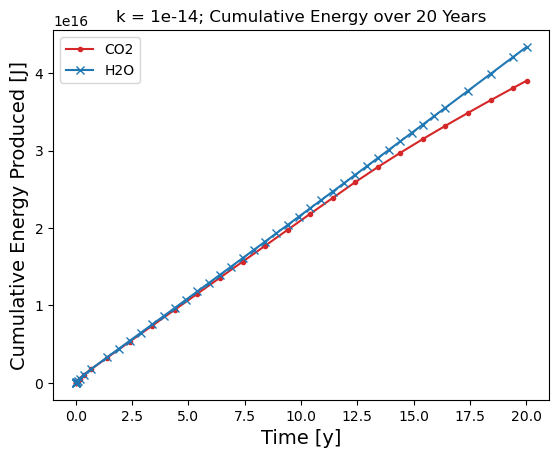

In [31]:
plt.plot(k_CO2_1em14["Time [y]"], k_CO2_1em14["Cumulative Energy Produced"],'C3', marker=".", linestyle ='-', label='CO2')
plt.plot(k_H2O_1em14["Time [y]"], k_H2O_1em14["Cumulative Energy Produced"],'C0', marker="x", linestyle ='-', label='H2O')
plt.title("k = 1e-14; Cumulative Energy over 20 Years")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Cumulative Energy Produced [J]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case8/Case8_cum_energy_k_1em14.png')

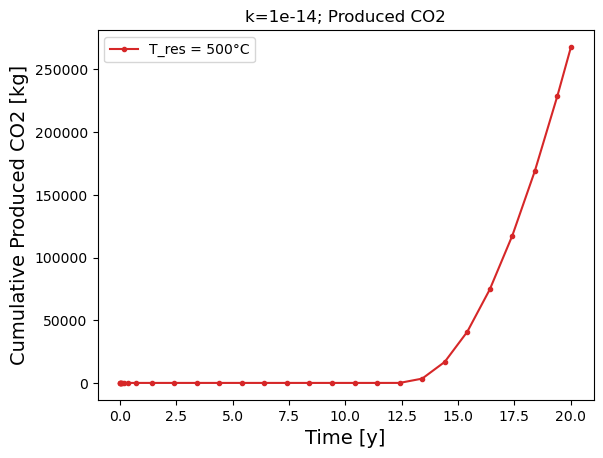

In [32]:
plt.plot(k_CO2_1em14["Time [y]"], k_CO2_1em14["Cumulative Produced CO2"],'C3', marker=".", linestyle ='-', label='T_res = 500°C')
plt.title("k=1e-14; Produced CO2")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Cumulative Produced CO2 [kg]',fontsize=14)
plt.legend()
# To prevent labels from being cut off in the figure --> bbox_inches='tight'
plt.savefig('Figures/Case8/Case8_co2_production_k_1em14.png', bbox_inches='tight')

In [33]:
# Mass of injected CO2 at 6kg/s CO2 mass flux

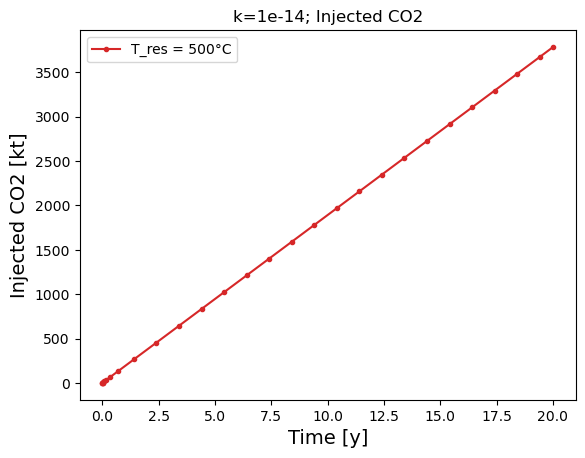

In [34]:
plt.plot(k_CO2_1em14["Time [y]"], k_CO2_1em14["Injected CO2 [kt]"],'C3', marker=".", linestyle ='-', label='T_res = 500°C')
plt.title("k=1e-14; Injected CO2")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Injected CO2 [kt]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case8/Case8_co2_injection_k_1em14.png')

In [35]:
#Stored CO2 in kt at mass flux CO2 6kg/s 

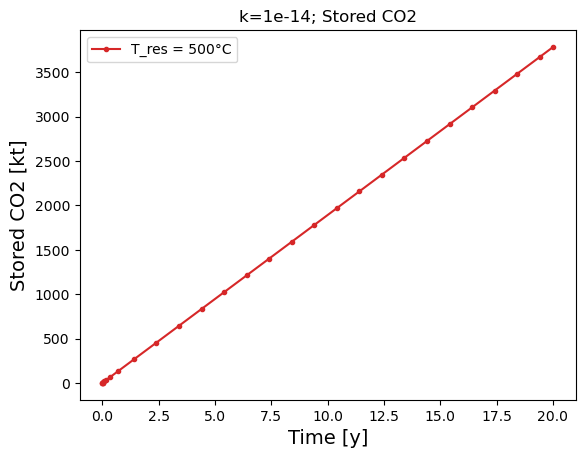

In [36]:
plt.plot(k_CO2_1em14["Time [y]"], k_CO2_1em14["Stored CO2 [kt]"],'C3', marker=".", linestyle ='-', label='T_res = 500°C')
plt.title("k=1e-14; Stored CO2")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Stored CO2 [kt]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case8/Case8_co2_stored_k_1em14.png')